<a href="https://colab.research.google.com/github/Aravinda89/Image-Classificatio-from-Scratch/blob/main/CH_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
! [ -e /content ] && pip install -Uqq fastai 

In [80]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import os
import random

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [16]:
IMAGE_PATH = 'gdrive/MyDrive/DataSets/CH_mnist/data'

In [63]:
path = Path(IMAGE_PATH)
Path.BASE_PATH = path

In [20]:
len(path.ls())

15000

In [24]:
path.ls()[:5]

(#5) [Path('input_84_5_4.jpg'),Path('input_97_5_3.jpg'),Path('input_94_7_14.jpg'),Path('input_84_6_11.jpg'),Path('input_88_10_4.jpg')]

In [84]:
file_list = path.ls()

gdrive/MyDrive/DataSets/CH_mnist/data/input_81_5_5.jpg


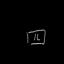

In [85]:
img_file = random.choice(file_list)
print(img_file)
im = Image.open(img_file)
im

In [86]:
im.size

(64, 64)

In [25]:
ls gdrive/MyDrive/DataSets/CH_mnist/

chinese_mnist.csv  data/


In [27]:
df = pd.read_csv("gdrive/MyDrive/DataSets/CH_mnist/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [42]:
df['img_name'] = 'input_'+ df['suite_id'].astype(str) + '_' + df['sample_id'].astype(str) + '_' +  df['code'].astype(str)+'.jpg'

In [44]:
df

,suite_id,sample_id,code,value,character,img_name
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg
...,...,...,...,...,...,...
14995,99,5,9,8,八,input_99_5_9.jpg
14996,99,6,9,8,八,input_99_6_9.jpg
14997,99,7,9,8,八,input_99_7_9.jpg
14998,99,8,9,8,八,input_99_8_9.jpg


In [56]:
df['value'].astype(str).value_counts()

7            1000
9            1000
2            1000
3            1000
4            1000
100          1000
1            1000
10000        1000
100000000    1000
10           1000
1000         1000
5            1000
6            1000
8            1000
0            1000
Name: value, dtype: int64

In [64]:
path

Path('.')

In [75]:
def get_x(r): return path/r['img_name']

def get_y(r): return r['value'].astype(str).split(" ")

In [94]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter = RandomSplitter(valid_pct=0.2, seed=66),
                   get_x = get_x,
                   get_y = get_y,
                   item_tfms = Resize(80, ResizeMethod.Squish),
                   batch_tfms= RandomResizedCrop(64, min_scale=0.35))

dls = dblock.dataloaders(df)

In [95]:
len(dls.train), len(dls.valid)

(187, 47)

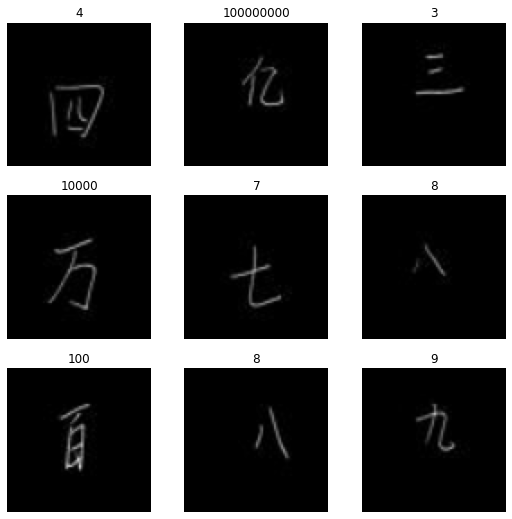

In [96]:
dls.show_batch()

In [101]:
dls.train_ds

(#12000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0.

In [98]:
dls.valid_ds

(#3000) [(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])),(PILImage mode=RGB size=64x64, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0.,

In [108]:
learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=[error_rate, accuracy])